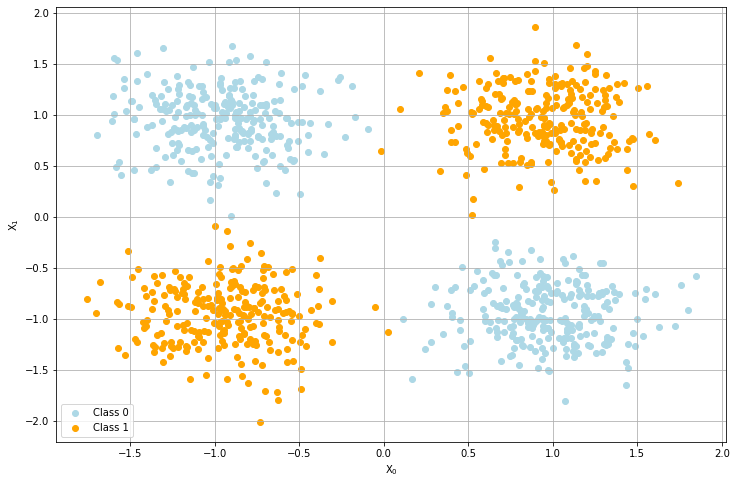

In [6]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle
import matplotlib.pyplot as plt

## setting the seed 
np.random.seed(805)

numb_samples = 1000
numb_obs = int(numb_samples / 4)

## Defining X and Y 
X = np.zeros((numb_samples, 2))
Y = np.zeros((numb_samples, ))

X[0:numb_obs, :] = np.random.multivariate_normal([1.0, -1.0], np.diag([0.1, 0.1]), size = numb_obs)
Y[0:numb_obs] = 0

X[numb_obs:(2*numb_obs), :] = np.random.multivariate_normal([1.0, 1.0], np.diag([0.1, 0.1]), size = numb_obs)
Y[numb_obs:(2*numb_obs)] = 1

X[(2*numb_obs):(3*numb_obs), :] = np.random.multivariate_normal([-1.0, 1.0], np.diag([0.1, 0.1]), size = numb_obs)
Y[(2*numb_obs):(3*numb_obs)] = 0

X[(3*numb_obs):, :] = np.random.multivariate_normal([-1.0, -1.0], np.diag([0.1, 0.1]), size = numb_obs)
Y[(3*numb_obs):] = 1

## Standardizing X
scaler = StandardScaler()
X = scaler.fit_transform(X)

X, Y = shuffle(X, Y, random_state = 805)
data = pd.DataFrame({'X_0': X[:, 0], 'X_1': X[:, 1], 'Y': Y})
data['Y'] = data['Y'].astype(int)

fig = plt.figure(figsize = (12, 8))

colors = ['lightblue', 'orange']

for i in data['Y'].unique():

    temp = data[data['Y'] == i]
    plt.scatter(temp['X_0'], temp['X_1'], color = colors[i])

params = {'mathtext.default': 'regular' }          
plt.rcParams.update(params)
plt.xlabel('$X_0$')
plt.ylabel('$X_1$')
plt.grid()
plt.legend(loc = 'lower left', labels = ['Class 0', 'Class 1'])
plt.show()

fig.savefig('chapter5_plot1.pdf')